# Homework 4
## Due Date:  Tuesday, October 27th at 11:59 PM

[Problem 0](#p0).  Homework Workflow [10 pts]

[Problem 1](#p1).  Motivating Automatic Differentiation [20 pts]

[Problem 2](#p2).  A Neural Network, Forward Mode [25 pts]

[Problem 3](#p3).  Visualizing Reverse Mode [10 pts]

[Problem 4](#p4).  A Toy AD Implementation [20 pts]

[Problem 5](#p5).  Continuous Integration and Coverage [15 pts]



## IMPORTANT
Don't forget to work on Milestone 1: [Milestone 1 Page](https://harvard-iacs.github.io/2020-CS107/project/M1/).

<a id='p0'></a>
## Problem 0: Homework Workflow
Once you receive HW3 feedback (no later than Wednesday 10/21), you will need to merge your `HW3-dev` branch into `master`. 

You will earn points for following all stages of the git workflow which involves:
* 3pts for merging `HW3-dev` into `master`
* 5pts for completing HW4 on `HW4-dev`
* 2pts for making a PR on `HW4-dev` to merge into `master`
![Sample Github Submission](../fig/HW4_submission.png)

<a id='p1'></a>
## Problem 1: Motivating Automatic Differentiation

For scalar functions of a single variable, the derivative is defined by
$$ f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}$$

We can approximate the derivative of a function using finite, but small  values of `h`.  All code for this problem should be contained in `P1.py`.

### Part A: Write a Numerical Differentiation Closure
Write a closure called `numerical_diff` which takes as inputs a function (of a single variable) `f` and a value of `h` and returns a function which takes as input a value of `x` that computes the numerical approximation of the derivative of `f` with stepsize `h` at `x`.

### Part B: Compare the Finite Difference to the True Derivative
Let $f(x) = \ln(x)$ and let $f^{\prime}\left(x\right)$ denote the first derivative of $f\left(x\right)$. Use your closure from Part A to compute $f^{\prime}_{FD}\left(x\right)$ for $0.2 \leq x \leq 0.4$ for $h=1\times 10^{-1}$, $h=1\times 10^{-7}$, and $h=1\times 10^{-15}$. Compare $f^{\prime}_{FD}\left(x\right)$ at the different values of $h$ to the exact derivative. Save your plot as `P1_fig.png`.

#### Notes:
- Compute the exact derivative explicitly.
- Your plot should be readable and interpretable (i.e., you should include axis labels and a legend). You may need to change the line style for all lines to be visible.
- Your plot will contain four lines:
    1. Analytical derivative
    2. $f^{\prime}_{FD}\left(x\right)$ for $h=1\times 10^{-1}$
    3. $f^{\prime}_{FD}\left(x\right)$ for $h=1\times 10^{-7}$
    4. $f^{\prime}_{FD}\left(x\right)$ for $h=1\times 10^{-15}$

### Part C: Why Automatic Differentiation?
Answer the following questions using two `print` statements to display your answers. These can be placed at the very end of `P1.py` (but before `plt.show()`).  Each print statement should start with the string: `"Answer to Q-i:"` where `i` is either `a` or `b` to reference the questions below.
- Q-a: Which value of $h$ most closely approximates the true derivative? What happens for values of $h$ that are too small? What happens for values of h that are too large?
- Q-b: How does automatic differentiation address these problems?


#### Deliverables
- `P1.py`
- `P1_fig.png`

Answer to Q-a: The value of h=1e-7 most closely approximates the value of the true derivative. If the value of h is too small we see that the approximation is very bad due to the numerical computation being limited by computer prescision. If the value of h is too large, then we get a poor approximation as we are not reflecting the limit as h->0 in the finite difference scheme. The jump in the derivative approximation between two pooints is too far, so the tangent line has the wrong angle and thus the approximation is incorrect.
Answer to Q-b: Automatic differentiation addresses this by not having a variable h in the scheme. Because Automatic differentiaction uses small recursive analytical sub evaulations, the accuracy of the method is as good as the accuracy of the computers compuation of each of these operation evaluations. Therefore, the algorithm is able to compute the derivative at computer precision automatically without requiring a hyperparameter.


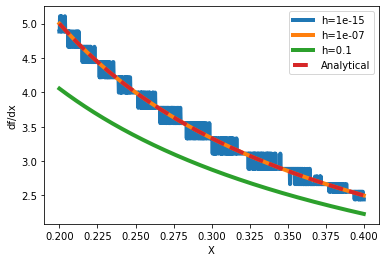

In [32]:
import numpy as np
import matplotlib.pyplot as plt

#PART A
def numerical_diff(f,h):
    def diff(x):
        dd=(f(x+h)-f(x))/h
        return dd
    return diff

#PART B
ff = lambda x: np.log(x)
dfdx = lambda x: 1/x

xx = np.linspace(0.2,0.4,1000)

hh=[1E-15,1E-7,0.1]

plt.figure()

for ih in hh:
    ndiff=numerical_diff(ff,ih)
    dfdx_fd=ndiff(xx)
    plt.plot(xx,dfdx_fd, label='h='+str(ih),lw=4)

plt.plot(xx,dfdx(xx),'--',label='Analytical',lw=4)
plt.xlabel('X')
plt.ylabel('df/dx')
plt.legend()
plt.savefig('P1_fig.png',format='png',dpi=300)


#PART C
print('Answer to Q-a: The value of h=1e-7 most closely approximates the value of the true derivative. If the value of h is too small we see that the approximation is very bad due to the numerical computation being limited by computer prescision. If the value of h is too large, then we get a poor approximation as we are not reflecting the limit as h->0 in the finite difference scheme. The jump in the derivative approximation between two pooints is too far, so the tangent line has the wrong angle and thus the approximation is incorrect.')
print('Answer to Q-b: Automatic differentiation addresses this by not having a variable h in the scheme. Because Automatic differentiaction uses small recursive analytical sub evaulations, the accuracy of the method is as good as the accuracy of the computers compuation of each of these operation evaluations. Therefore, the algorithm is able to compute the derivative at computer precision automatically without requiring a hyperparameter.')

plt.show()


<a id='p2'></a>
## Problem 2: A Neural Network, Forward Mode

Artificial neural networks take as input the values of an input layer of neurons and combine these inputs in a series of layers to compute an output.  A small network with a single hidden layer is drawn below.

![NN](../fig/NNFigNoPhi.png)

This network can be expressed in matrix notation as $$f\left(x,y\right) = w_{\text{out}}^{T}z\left(W\begin{bmatrix}x \\ y \end{bmatrix} + \begin{bmatrix}b_{1} \\ b_{2}\end{bmatrix}\right) + b_{\text{out}}$$ where $$W = \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22}\end{bmatrix}$$ is a (real) matrix of weights, $$w_{\text{out}} = \begin{bmatrix} w_{\text{out},1} \\ w_{\text{out},2} \end{bmatrix}$$ is a vector representing output weights, $b_i$ are bias terms, and $z$ is a nonlinear function that acts component-wise.

The above graph helps us visualize the computation in different layers.  This visualization hides many of the underlying operations which occur in the computation of $f$ (e.g. it does not explicitly express the elementary operations).  

#### Your Tasks
In this part, you will completely neglect the biases, $b_{i}$ and $b_{\text{out}}$.  The mathematical form is therefore $$f\left(x,y\right) = w_{\text{out}}^{T}z\left(W\begin{bmatrix}x \\ y \end{bmatrix}\right).$$  Note that in practical applications the biases play a key role.  However, we have elected to neglect them in this problem so that your results are more readable.  You will complete the two steps below while neglecting the bias terms.

1. As we have done in lecture, draw the complete forward graph.  You may treat $z$ as a single elementary operation. Submit a picture of the graph as `P2_graph.png`.  This picture can be a picture taken of your graph drawn on a piece of paper or it can be something that you draw electronically.
2. Use your graph to write out the full forward mode table and submit a picture of the table as `P2_table.png`.  This table can, once again, be done on a piece of paper or in markdown.

#### Submission Notes:
- For the graph, you should explicitly show the multiplications and additions that are masked in the schematic of the network above.
- You should relabel the nodes of the graph with traces (e.g. $x_{13}$) as we have done in class.
- Your table should include columns for the trace, elementary function, current function value, elementary function derivative, partial x derivative, and partial y derivative.  Here is an example table with a row filled in (**Note:** Your table will not contain this exact row.  Your table will have something else for $x_{4}$.)

![table](../fig/table.png)


- The values in your table should be in terms of $w_{1, out}, w_{2, out}, w_{11}, w_{12}, w_{21}, w_{22}, z,$ and $z^{\prime}$, where $\prime$ denotes a derivative.
- Pictures of handwritten graphs and tables are fine but make sure that these are legible.
- Table values should also be in terms of $x$ and $y$.

#### Deliverables
- `P2_graph.png`
- `P2_table.png`

<a id='p3'></a>
## Problem 3: Visualizing Reverse Mode
This problem provides you with a tool to help visualize automatic differentiation.  This automatic differentiation code base and GUI originated as the fall 2018 CS207 final project extension for Lindsey Brown, Xinyue Wang, and Kevin Yoon, and it has undergone further development. It is meant to be a resource for you as you learn automatic differentiation.


### Part A: Preview of Virtual Environments
In lecture, we will be learning about how to use virtual environments to create workspaces to use only certain packages.  For this problem, we will walk through how to set up a virtual environment using `conda` to create a workspace to contain a GUI to help with the visualization of the automatic differentiation functions.

1. Set up a virtual environment.  Use the command `conda create -n env_name python=3.6 anaconda` where `env_name` is a name of your choosing for your virtual environment.
2. Activate your virtual environment, using `source activate env_name`.
   - Note:  Some systems might given an error here and ask you to execute a different sequence of commands.  If this happens, please follow the commands suggested in your terminal.
3. Clone the Auto-eD repository: `git clone https://github.com/lindseysbrown/Auto-eD.git`.
4. Change into the new directory, `cd Auto-eD`.
5. Install the dependencies using `pip install -r requirements.txt`.


### Part B: Visualize Backward Mode for the Neural Network
For this part, we will use the simplified neural network model (no bias terms) from Problem 2 again.  For this part only (Problem 3B), take $w_{out} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$, $W = \begin{bmatrix} 1.1 & 1.2 \\ 2.1 & 2.2 \end{bmatrix}$, and $z$ to be the identity.

To do so you'll be inputing $f(x,y)$ into either the command line (option A) or the GUI (option B), so you will need $f(x,y)$ in scalar form. (Hint:  This should be the last line of your evaluation table.) **Do not simplify by multiplying the weights togther.  Each of the 6 constants should appear in the function expression exactly once.**  This will look strange, but it is the way that you should do the problem.

Visualize the reverse mode through one of the two following options.

#### Option A: Run Auto-eD Locally
1.  Run the file using `python ADappHeroku.py`. If you get a `ImportError: Python is not installed as a framework.` error, try running `pythonw ADappHeroku.py`instead.
2. Go to `http://0.0.0.0:5000/` in your web browser
3.  Follow the input instructions.  You are free to choose any $x$ and $y$ value at which to evaluate the function and its derivatives.
4.  Save the reverse mode graph as `P3_graph.png`.
5.  Deactivate your virtual environment using `conda deactivate`.

#### Option B: Use the Website
**Note:**  Due to server limitations, the Auto-eD website only allows for a low number of simultaneous sessions, so there may be errors or latency. We'd prefer you ran the package locally.

1.  Go to https://autoed.herokuapp.com/ in your web browser.
2. Follow the input instructions.  You are free to choose any $x$ and $y$ value at which to evaluate the function and its derivatives.
3.  Save the reverse mode graph as `P3_graph.png`.
4.  Deactivate your virtual environment using `conda deactivate`.

#### Deliverables
- `P3_graph.png`

#### Notes:
- Please use the input calculator instead of typing the equation into the text box
- Please explicitly input multiplication (e.g. input `4*x` and not `4x`)
- The app may display a simplified equation after you press `calculate`. The reverse mode, however, will still show all operations you input. Please do not simplify the equation as you input it.


<a id='p4'></a>
## Problem 4:  A Toy AD Implementation

You will write a toy forward automatic differentiation class.  Write a class called `AutoDiffToy` that can return the derivative (with respect to $x$) of functions of the form $$f = \alpha x + \beta$$ for constants $\alpha, \beta \in \mathbb{R}$.

#### Interface
* Must contain a constructor that sets the value of the function and derivative
  - This would be like the first row in the evaluation trace tables that we've been making.
* Must overload functions where appropriate.
  - **Note:** Python's `__add__(self, other)` and `__mul__(self, other)` methods are meant to be defined for objects of the same type.  Your implementation should not assume that `other` is a real number but be robust enough to handle the case when it is.
* Handle exceptions appropriately.
  - This is a good place to use (and practice) duck-typing.  For example, rather than checking if an argument to a special method is an instance of the object, instead use a `try-except` block, catch an `AttributeError` and do the appropriate calculation.
  - **Hint:** [Asking Forgiveness](https://softwareengineering.stackexchange.com/questions/175655/python-forgiveness-vs-permission-and-duck-typing)

#### Use Case
```python
a = 2.0 # Value to evaluate at
x = AutoDiffToy(a)

alpha = 2.0
beta = 3.0
f = alpha * x + beta
```

#### Output
```python
print(f.val, f.der)
7.0 2.0
```

#### Requirements
* Implementation must be robust enough to handle functions written in the form
```python
f = alpha * x + beta
f = x * alpha + beta
f = beta + alpha * x
f = beta + x * alpha
```
* You should demo your code with an example for each of these 4 cases.

#### Deliverables
- `P4.py` containing your class and demo

In [10]:
# AutoDiffToy class
class AutoDiffToy():
    def __init__(self, val, der=1):
        #store the initial value and the derivative into the class variables
        self.val = val
        self.der = der    
    def __add__(self, other):
        try: #try to see if other is of the same type; if not go to the next step
            return AutoDiffToy(self.val+other.val,self.der+other.der)
        except AttributeError: # this occurs if not the same type meaning, we are adding a constant
            return AutoDiffToy(self.val+other,self.der)
    def __mul__(self, constant): #we must multiply the value and its deriative by whatever constant it is being multiplied by
        return AutoDiffToy(self.val*constant,self.der*constant)
    def __rmul__(self, constant): # this fixes the case in which the order of multiplication is switched
        return self.__mul__(constant)
    def __radd__(self, constant): # this fixes the case in which the order of addition is switched
        return self.__add__(constant)

In [11]:
a = 2.0 # Value to evaluate at
x = AutoDiffToy(a)

alpha = 2.0
beta = 3.0

In [12]:
f = alpha * x + beta
print(f.val, f.der)
f = x * alpha + beta
print(f.val, f.der)
f = beta + alpha * x
print(f.val, f.der)
f = beta + x * alpha
print(f.val, f.der)

7.0 2.0
7.0 2.0
7.0 2.0
7.0 2.0


<a id='p5'></a>
## Problem 5 [15 pts]: Continuous Integration

**Note:** You will not be able to start this problem until after lecture 13.

We discussed documentation and testing in lecture (or will very soon) and also briefly touched on code coverage.  You must write tests for your code in your final project (and in life).  There is a nice way to automate the testing process called continuous integration (CI). This problem will walk you through the basics of CI and show you how to get up and running with some CI software.

The idea behind continuous integration is to automate aspects of the testing process. 

The basic workflow goes something like this:

1. You work on your part of the code in your own branch or fork.
2. On every commit you make and push to GitHub, your code is automatically tested by an external service (e.g. Travis CI). This ensures that there are no specific dependencies on the structure of your machine that your code needs to run and also ensures that your changes are sane.
3. When you want to merge your changes with the master / production branch you submit a pull request to `master` in the main repo (the one you're hoping to contribute to). The repo manager creates a branch off `master`. 
4. This branch is also set to run tests on Travis. If all tests pass, then the pull request is accepted and your code becomes part of master.

In this problem, we will use GitHub to integrate our roots library with Travis CI and CodeCov. (Note that this is not the only workflow people use.)

### Part A:
Create a **public** GitHub repo called `cs107test` and clone it to your local machine.  (**Note:** This should be done **outside** your course repo.)

### Part B:

Use the example from lecture 13 to create a file called `roots.py`, which contains the `quad_roots` and `linear_roots` functions (along with their documentation). Now, also create a file called `test_roots.py`, which contains the tests from lecture.

All of these files should be in your newly created `cs107test` repo.  **Don't push yet!!!**

### Part C: Create an account on Travis CI and Start Building

Create an account on [Travis CI](https://travis-ci.org/) and set your `cs107test` repo up for continuous integration once this repo can be seen on Travis.

### Part D:
Create an instruction to Travis to make sure that

1. python 3.6 is installed
2. pytest is installed

The file should be called `.travis.yml` and should have the contents (**Note:** The `yml` line *should not* be present in your file.  This is a rendering issue with the html.  Everything below `yml` should be in your file.  Please download and open the Jupyter notebook to see the correct format with synatx highlighting.):
```yml
language: python
python:
    - "3.6"
before_install:
    - pip install pytest pytest-cov
script:
    - pytest
```

### Part E:
Push the new changes to your `cs107test` repo.

At this point you should be able to see your build on Travis and if and how your tests pass.

### Part F:  CodeCov Integration
In class, we also discussed code coverage.  Just like Travis CI runs tests automatically for you, CodeCov automatically checks your code coverage.

Create an account on [`CodeCov`](https://codecov.io/), connect your GitHub, and turn CodeCov integration on.

### Part G:
Update your the `.travis.yml` file as follows (**Note:** The `yml` line *should not* be present in your file.  This is a rendering issue with the html.  Everything below `yml` should be in your file.  Please download and open the Jupyter notebook to see the correct format with synatx highlighting.):
```yml
language: python
python:
    - "3.6"
before_install:
    - pip install pytest pytest-cov
    - pip install codecov
script:
    - pytest --cov=./
after_success:
    - codecov
```

Be sure to push the latest changes to your new repo.

### Part H:
You can have your GitHub repo reflect the build status on Travis CI and the code coverage status from CodeCov.  To do this, you should modify the `README.md` file in your repo to include some badges.  Put the following at the top of your `README.md` file:

```
[![Build Status](https://travis-ci.org/dsondak/cs207testing.svg?branch=master)](https://travis-ci.org/dsondak/cs207testing.svg?branch=master)

[![Coverage Status](https://codecov.io/gh/dsondak/cs207testing/branch/master/graph/badge.svg)](https://codecov.io/gh/dsondak/cs207testing)
```

Of course, you need to make sure that the links are to your repo and not mine.  You can find embed code on the CodeCov and Travis CI sites.

#### Deliverables
- `P5.md` which contains a link to your public `cs107test` repo.  The course staff will grade the `README` in that repository. 